In [1]:
import seaborn as sns
import pandas as pd
import kneed
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from time import time
import numpy as np

In [2]:
def read_file(url):

    url = url + "?raw=true"
    df = pd.read_csv(url, encoding='cp1252', sep=',', low_memory=False)
    return df

In [3]:
url = "https://github.com/hannahgathu/Thesis-Data-Visualisations/blob/main/Data/dielectron_classification.csv"

df= read_file(url)

## Visualization

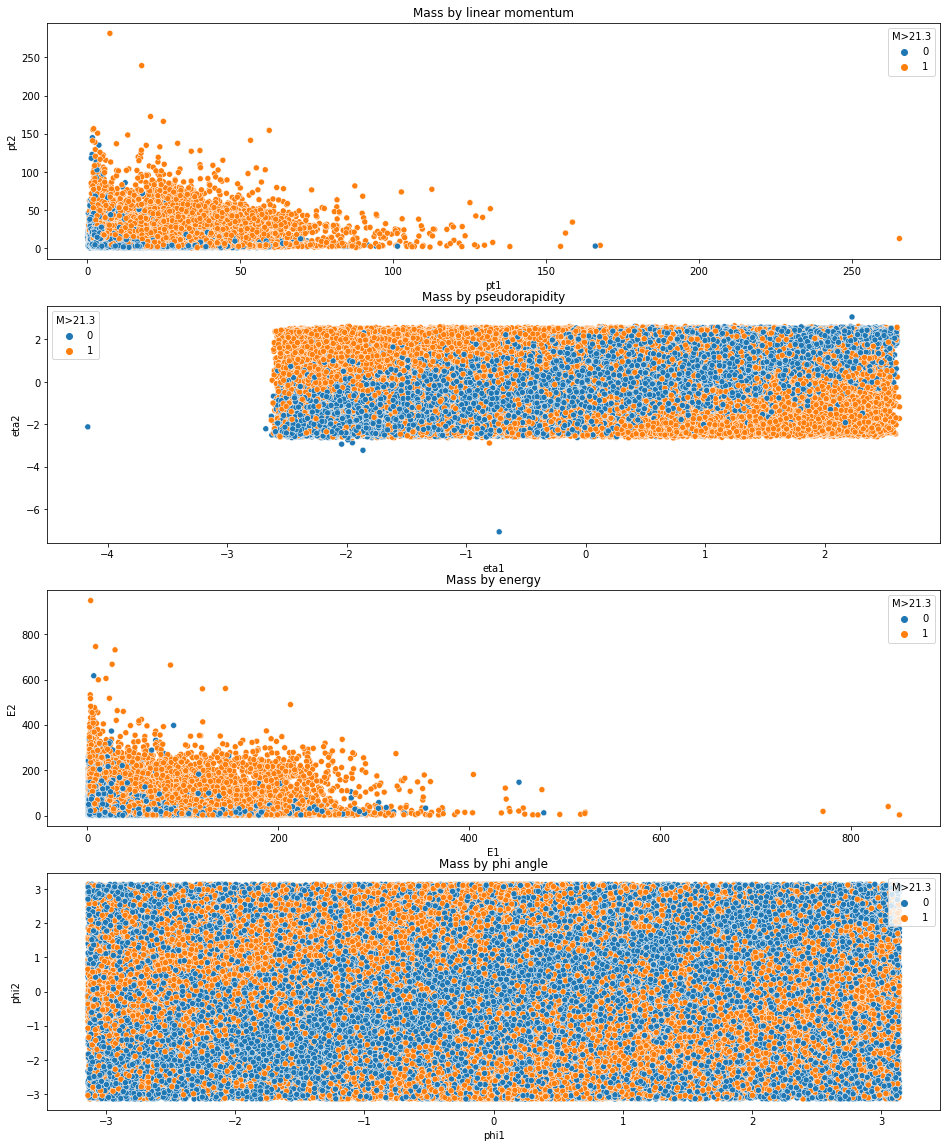

In [4]:
fig,ax = plt.subplots(nrows=4,ncols=1,figsize=(16,20))

sns.scatterplot(ax= ax[0],data=df, x='pt1', y='pt2', hue='M>21.3')
ax[0].set_title('Mass by linear momentum')
sns.scatterplot(ax= ax[1],data=df, x='eta1', y='eta2', hue='M>21.3')
ax[1].set_title('Mass by pseudorapidity')
sns.scatterplot(ax= ax[2],data=df, x='E1', y='E2', hue='M>21.3')
ax[2].set_title('Mass by energy')
sns.scatterplot(ax= ax[3],data=df, x='phi1', y='phi2', hue='M>21.3')
ax[3].set_title('Mass by phi angle')

plt.show()

In [5]:
predictions_alldata['M>21.3']=df['M>21.3']
predictions_confident = predictions_alldata.loc[(predictions_alldata['prob1'] >0.6) | (predictions_alldata['prob1'] < 0.4)]

NameError: name 'predictions_alldata' is not defined

In [ ]:
predictions_confident.shape[0]

In [ ]:
fig,ax = plt.subplots(nrows=4,ncols=1,figsize=(16,20))

sns.scatterplot(ax= ax[0],data=predictions_confident, x='pt1', y='pt2', hue='M>21.3')
ax[0].set_title('Mass by linear momentum')
sns.scatterplot(ax= ax[1],data=predictions_confident, x='eta1', y='eta2', hue='M>21.3')
ax[1].set_title('Mass by pseudorapidity')
sns.scatterplot(ax= ax[2],data=predictions_confident, x='E1', y='E2', hue='M>21.3')
ax[2].set_title('Mass by energy')
sns.scatterplot(ax= ax[3],data=predictions_confident, x='phi1', y='phi2', hue='M>21.3')
ax[3].set_title('Mass by phi angle')

plt.show()

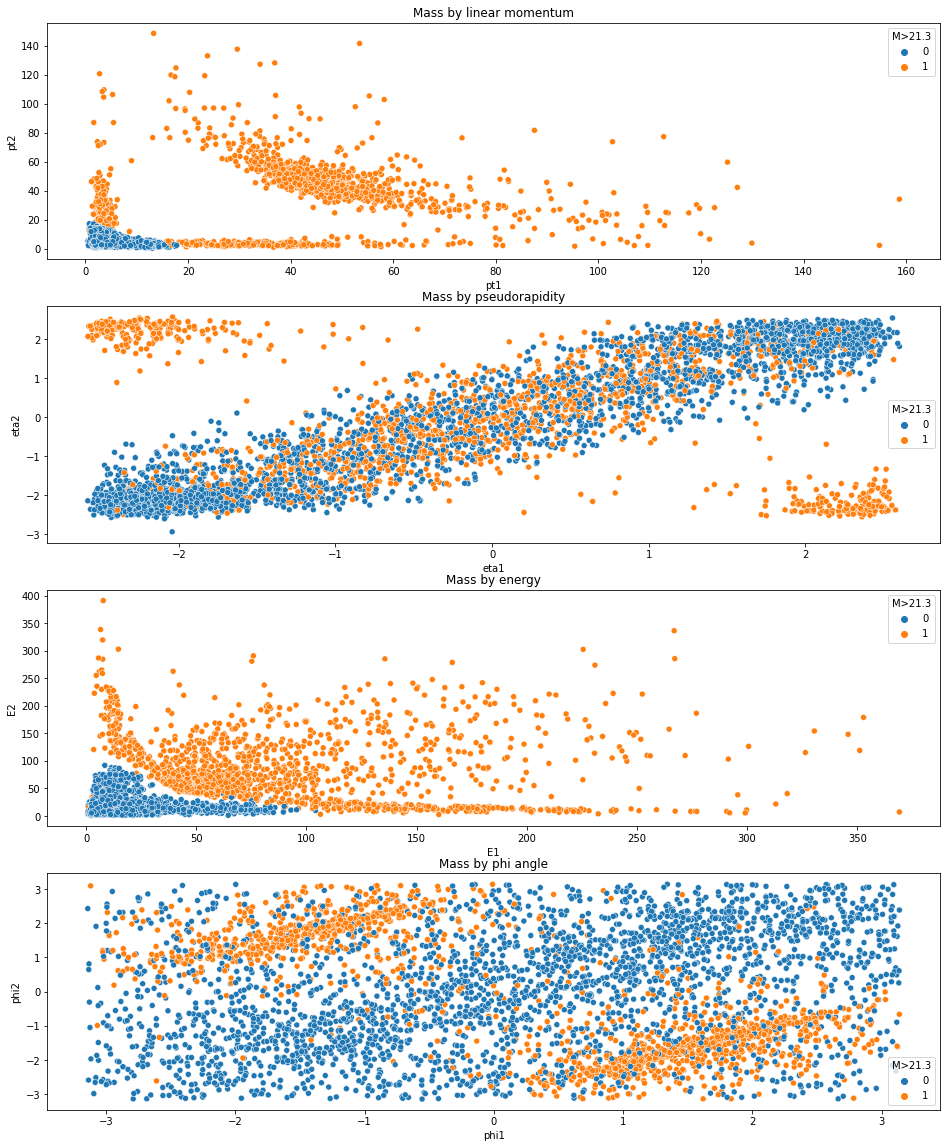

In [103]:
fig,ax = plt.subplots(nrows=4,ncols=1,figsize=(16,20))

sns.scatterplot(ax= ax[0],data=predictions_confident, x='pt1', y='pt2', hue='M>21.3')
ax[0].set_title('Mass by linear momentum')
sns.scatterplot(ax= ax[1],data=predictions_confident, x='eta1', y='eta2', hue='M>21.3')
ax[1].set_title('Mass by pseudorapidity')
sns.scatterplot(ax= ax[2],data=predictions_confident, x='E1', y='E2', hue='M>21.3')
ax[2].set_title('Mass by energy')
sns.scatterplot(ax= ax[3],data=predictions_confident, x='phi1', y='phi2', hue='M>21.3')
ax[3].set_title('Mass by phi angle')

plt.show()

## Model prediction

### Data selection

In [6]:
y=df.M>21.3
#additional to dropping the endpoints we also drop the run and event numbers, because those aren't predictors
X=df.drop(columns=['M>21.3','M','Run','Event'])

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)


### Scale data

In [7]:
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_scaled = scaling.transform(X)
X_train_scaled = scaling.transform(X_train)
X_test_scaled = scaling.transform(X_test)

### SVM

In [6]:
model = SVC(probability=True, verbose=True)
t0 = time()
model.fit(X_train_scaled, y_train)
print ('training time: ', round(time()-t0, 3), 's')
pred = model.predict(X_test_scaled)
print ('predicting time: ', round(time()-t1, 3), 's')

[LibSVM]training time:  997.111 s


NameError: name 't1' is not defined

In [66]:
print("Accuracy:",metrics.accuracy_score(y_test, pred))

Accuracy: 0.8850666666666667


In [ ]:
prob = model.predict_proba(X_test_scaled)

In [59]:
prob0=np.empty(30000)
prob1=np.empty(30000)
prob0.shape
for x in range(30000):
    prob0[x] = prob[x,0] 
    prob1[x] = prob[x,1]

In [62]:
predictions = pd.DataFrame(X_test)
predictions['pred'] = pred
predictions['prob0'] = prob0
predictions['prob1'] = prob1
predictions.to_csv('predictions_test.csv')

In [77]:
pred_alldata= model.predict(X_scaled)

In [68]:
prob_alldata = model.predict_proba(X_scaled)

In [69]:
prob1_alldata=np.empty(100000)
for x in range(100000):
    prob1_alldata[x] = prob_alldata[x,1] 

In [78]:
predictions_alldata = pd.DataFrame(X)
predictions_alldata['pred'] = pred_alldata
predictions_alldata['prob1'] = prob1_alldata
predictions_alldata.to_csv('predictions_alldata.csv')

### Random Forest

In [8]:
rf = RandomForestClassifier()
t0 = time()
rf.fit(X_train, y_train)
print ('training time: ', round(time()-t0, 3), 's')
t1=time()
pred_rf = rf.predict(X_test)
print ('predicting time: ', round(time()-t1, 3), 's')

training time:  17.966 s
predicting time:  0.401 s


In [106]:
print("Accuracy:",metrics.accuracy_score(y_test, pred_rf))

Accuracy: 0.9570666666666666


In [ ]:
prob = rf.predict_proba(X_test)